<a href="https://colab.research.google.com/github/manojkumarshenu/Encryptix-/blob/main/credit_card_fraud_detection(task2)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/almabetter 1/Task 2/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/almabetter 1/Task 2/fraudTest.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
print(len(train_data),len(test_data))

1296675 555719


In [ ]:
df = pd.concat([train_data,test_data])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [ ]:
len(df)

1852394

In [ ]:
df.shape

(1852394, 23)

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Data visuliation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

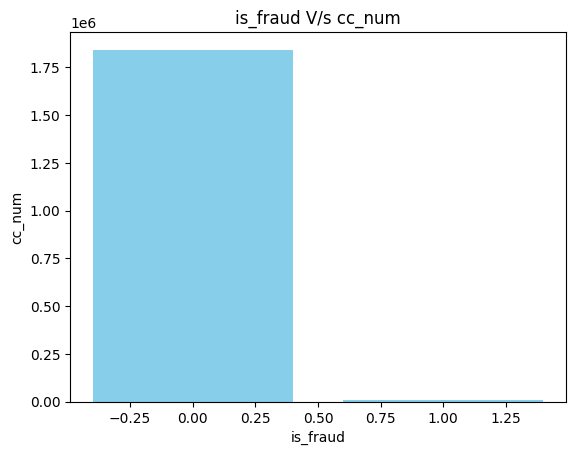

In [ ]:
x = df.groupby('is_fraud').count()['cc_num']
plt.bar(x.index,height=x,color ='skyblue')
plt.title('is_fraud V/s cc_num')
plt.xlabel('is_fraud')
plt.ylabel('cc_num')
plt.show()

Fraudulent transcation is smalle then non fraudulan transcation their is a high performance of non fraudulent transcation as compare to fraudulent transcation

In [ ]:
fraud = df[df['is_fraud']==1]
non_fraud = df[df['is_fraud']==0]
print(len(fraud),len(non_fraud))

9651 1842743


In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [ ]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Data Preparation

In [ ]:
df_balance = pd.concat([fraud, non_fraud.sample(len(fraud), random_state= 42)])

In [ ]:
df_balance.shape

(19302, 23)

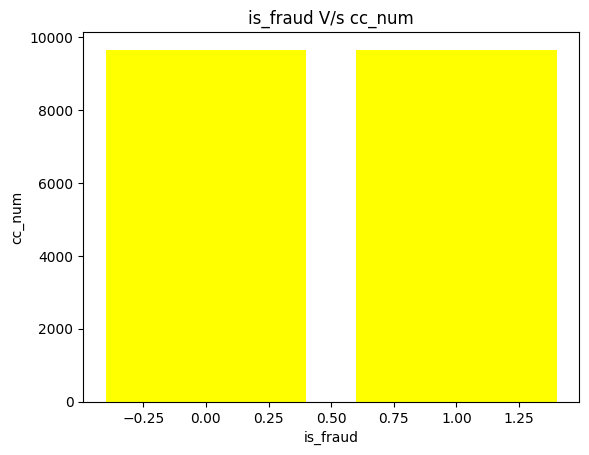

In [ ]:
x = df_balance.groupby('is_fraud').count()['cc_num']
plt.bar(x.index,height = x, color ='yellow')
plt.title('is_fraud V/s cc_num')
plt.xlabel("is_fraud")
plt.ylabel('cc_num')
plt.show()

In [ ]:
df_balance.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
dropped_columns = ['Unnamed: 0','cc_num','merchant','first','last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip']
df_balance.drop(columns=dropped_columns, axis=1, inplace=True)

In [ ]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  19302 non-null  object 
 1   category               19302 non-null  object 
 2   amt                    19302 non-null  float64
 3   city                   19302 non-null  object 
 4   state                  19302 non-null  object 
 5   lat                    19302 non-null  float64
 6   long                   19302 non-null  float64
 7   city_pop               19302 non-null  int64  
 8   dob                    19302 non-null  object 
 9   is_fraud               19302 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.6+ MB


# Freature Enginnering


# Datetime

In [ ]:
df_balance['trans_date_trans_time']= pd.to_datetime(df_balance['trans_date_trans_time'])
df_balance['dob'] = pd.to_datetime(df_balance['dob'])

In [ ]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  19302 non-null  datetime64[ns]
 1   category               19302 non-null  object        
 2   amt                    19302 non-null  float64       
 3   city                   19302 non-null  object        
 4   state                  19302 non-null  object        
 5   lat                    19302 non-null  float64       
 6   long                   19302 non-null  float64       
 7   city_pop               19302 non-null  int64         
 8   dob                    19302 non-null  datetime64[ns]
 9   is_fraud               19302 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [ ]:
df_balance['trans_date_trans_time'] = df_balance['trans_date_trans_time'].dt.hour
df_balance = df_balance.rename(columns={'trans_date_trans_time':'hour_transcation'})

In [ ]:
def get_trans_hour(hour):
  if 4<hour['hour_transcation'] <=12:
    ans = 'morning'
  elif 12 < hour['hour_transcation'] <= 20:
    ans = 'afternon'
  elif hour['hour_transcation']<=4 or hour['hour_transcation']>20:
    ans = 'night'
  return ans


In [ ]:
df_balance['hour_transcation'] = df_balance.apply(get_trans_hour, axis=1)

In [ ]:
df_balance.head()

,hour_transcation,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1


In [ ]:
df_balance.head()

,hour_transcation,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988,1
2472,night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960,1
2523,night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960,1
2546,night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988,1
2553,night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960,1


In [ ]:
df_balance = df_balance.rename(columns = {'dob':'age'})

In [ ]:
df_balance['age'].head()

2449    1988
2472    1960
2523    1960
2546    1988
2553    1960
Name: age, dtype: int32

In [ ]:
from datetime import datetime
df_balance['age'] = datetime.now().year - df_balance['age']

In [ ]:
df_balance['age'].head()

2449    36
2472    64
2523    64
2546    36
2553    64
Name: age, dtype: int32

In [ ]:
df_balance[df_balance['is_fraud']==1].groupby('age').count()['is_fraud']

age
19      7
20     32
21     21
22     12
23     58
       ..
96     41
97     54
98     33
99     11
100     7
Name: is_fraud, Length: 82, dtype: int64

Label Encoding

In [ ]:
numerical_feature = [i for i in df_balance.columns if df_balance[i].dtype == 'int64'or df_balance[i].dtype =='int32' or df_balance[i].dtype =='float64']
categorical_feature = [i for i in df_balance.columns if df_balance[i].dtype == 'object']


In [ ]:
print(numerical_feature)
print(categorical_feature)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['hour_transcation', 'category', 'city', 'state']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_balance[categorical_feature])
df_balance[categorical_feature]= encoder.transform(df_balance[categorical_feature])

In [ ]:
df_balance.head()

,hour_transcation,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,165.0,27.0,35.9946,-81.7266,885,36,1
2472,2.0,2.0,11.52,733.0,43.0,29.4400,-98.4590,1595797,64,1
2523,2.0,4.0,276.31,733.0,43.0,29.4400,-98.4590,1595797,64,1
2546,2.0,2.0,7.03,165.0,27.0,35.9946,-81.7266,885,36,1
2553,2.0,4.0,275.73,733.0,43.0,29.4400,-98.4590,1595797,64,1


In [ ]:
df_balance[['is_fraud', 'age']] = df_balance[['is_fraud', 'age']].astype('float64')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balance)
df_scaled = pd.DataFrame(df_scaled)

In [ ]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.307692,0.037304,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.001401,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.036672,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000803,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.036594,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0


In [ ]:
last_column = df_scaled.shape[1]-1

In [ ]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 9651
Fraud: 9651


In [ ]:
df_scaled.rename(columns={last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,1.0,0.307692,0.037304,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.001401,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.036672,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.000803,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.036594,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
x = df_scaled.drop(columns='is_fraud')
y = df_scaled['is_fraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 )

# Loggistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Now let's define a function to get the predictions and set the threshold

def predict(model, test_set, threshold):
    predictions = model.predict(test_set)
    pred_threshold = model.predict_proba(test_set)
    test_set["prediction"] = predictions
    test_set["pred_threshold"] = (pred_threshold >= threshold)[:, 1].astype(float)
    return test_set

In [ ]:
predict(lr, x_test, 0.4)

,0,1,2,3,4,5,6,7,8,prediction,pred_threshold
10529,0.0,0.923077,0.000032,0.230939,0.18,0.190112,0.863930,0.030520,0.209877,0.0,0.0
15361,0.5,0.153846,0.008027,0.717127,0.02,0.306858,0.797742,0.001980,0.654321,0.0,0.0
12160,0.0,0.769231,0.010819,0.818785,0.76,0.434610,0.914594,0.000275,0.283951,0.0,0.0
2953,1.0,0.384615,0.002729,0.709392,0.86,0.244708,0.635407,0.004378,0.222222,0.0,1.0
15870,0.0,0.000000,0.009766,0.477348,0.46,0.518806,0.720395,0.000511,0.148148,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17155,0.0,0.692308,0.000574,0.093923,0.42,0.514942,0.979377,0.001101,0.098765,0.0,0.0
17454,0.5,0.153846,0.006062,0.976796,0.48,0.358675,0.732927,0.000254,0.246914,0.0,0.0
12681,1.0,1.000000,0.001007,0.977901,0.20,0.232642,0.832440,0.001172,0.679012,0.0,0.0
15764,0.0,0.384615,0.000481,0.667403,0.08,0.380590,0.444976,0.131228,0.382716,0.0,0.0


The 'prediction' column is for standard threshold (0.5) and the 'pred_threshold' stands for our results with the changed threshold.

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
x_test["real"] = y_test["is_fraud"]

In [ ]:
x_test.head(5)

,0,1,2,3,4,5,6,7,8,prediction,pred_threshold,real
10529,0.0,0.923077,0.000032,0.230939,0.18,0.190112,0.863930,0.030520,0.209877,0.0,0.0,0.0
15361,0.5,0.153846,0.008027,0.717127,0.02,0.306858,0.797742,0.001980,0.654321,0.0,0.0,0.0
12160,0.0,0.769231,0.010819,0.818785,0.76,0.434610,0.914594,0.000275,0.283951,0.0,0.0,0.0
2953,1.0,0.384615,0.002729,0.709392,0.86,0.244708,0.635407,0.004378,0.222222,0.0,1.0,1.0
15870,0.0,0.000000,0.009766,0.477348,0.46,0.518806,0.720395,0.000511,0.148148,0.0,0.0,0.0


In [ ]:
# With 0.5 threshold
print(classification_report(x_test['real'], x_test['prediction']))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80      1932
         1.0       0.81      0.78      0.80      1929

    accuracy                           0.80      3861
   macro avg       0.80      0.80      0.80      3861
weighted avg       0.80      0.80      0.80      3861



In [ ]:
print(classification_report(x_test['real'], x_test['pred_threshold']))

              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80      1932
         1.0       0.76      0.94      0.84      1929

    accuracy                           0.82      3861
   macro avg       0.84      0.82      0.82      3861
weighted avg       0.84      0.82      0.82      3861



In [ ]:
def confusion_matrix_plot(test_set, pred_label, model):
    cm = confusion_matrix(x_test['real'], x_test[pred_label], labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    plt.show()

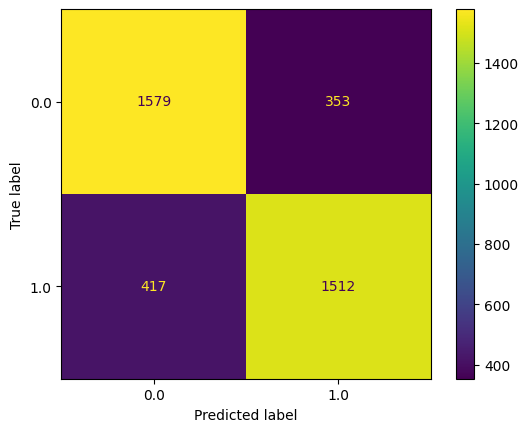

In [ ]:
confusion_matrix_plot(x_test, 'prediction', lr)

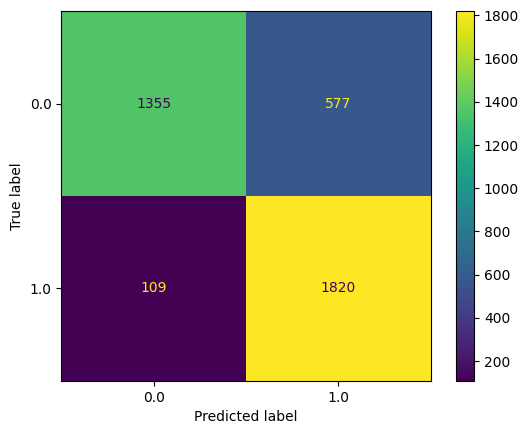

In [ ]:
confusion_matrix_plot(x_test, 'pred_threshold', lr)